<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/ESAA_0916_Week3_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Exploration Notebook - Instacart

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()

%matplotlib inline
pd.options.mode.chained_assignment = None

In [26]:
from google.colab import drive
drive.mount('/content/drive')

from subprocess import check_output

import os
print(os.getcwd())

print(check_output(["ls", "/content/drive/MyDrive/Kaggle"]).decode("utf8"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [27]:
order_products_train_df=pd.read_csv('/content/drive/MyDrive/Kaggle/order_products__train.csv')
order_products_prior_df=pd.read_csv('/content/drive/MyDrive/Kaggle/order_products__prior.csv')
orders_df=pd.read_csv('/content/drive/MyDrive/Kaggle/orders.csv')
products_df=pd.read_csv('/content/drive/MyDrive/Kaggle/products.csv')
aisles_df=pd.read_csv('/content/drive/MyDrive/Kaggle/aisles.csv')
departments_df=pd.read_csv('/content/drive/MyDrive/Kaggle/departments.csv')

In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior_df.head() # prior data: knowledge or belief about the data or model parameters before observing the actual data

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_train_df.head() # train data: the subset of the dataset that is used to train or teach the machine learning model

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


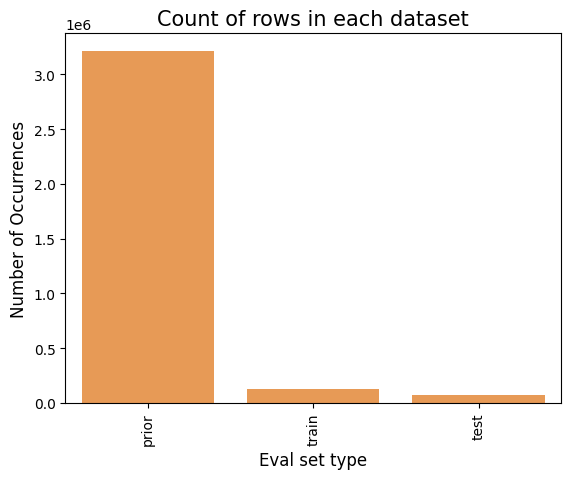

In [ ]:
cnt_srs = orders_df.eval_set.value_counts() # value_counts를 하면 index와 values가 생김
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8,color=color[1])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Eval set type',fontsize=12)
plt.title('Count of rows in each dataset',fontsize=15)
plt.xticks(rotation='vertical') # 이름으로 줄 수 있음
plt.show()

In [ ]:
def get_unique_counts(x):
  return len(np.unique(x))

cnt_srs=orders_df.groupby('eval_set')['user_id'].agg(get_unique_counts)

cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


<ipython-input-10-999dcbb31e40>:1: FutureWarning: The provided callable <function max at 0x7bf6d98c79a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby('user_id')['order_number'].agg(np.max).reset_index()


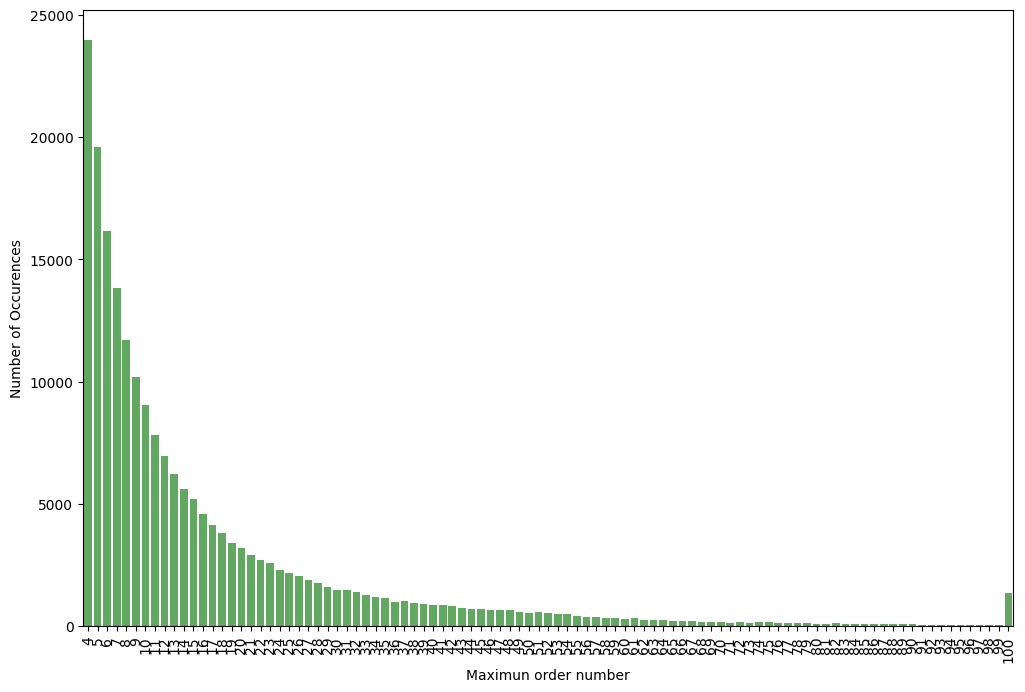

In [ ]:
cnt_srs = orders_df.groupby('user_id')['order_number'].agg(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8,color=color[2])
plt.xlabel('Maximun order number')
plt.ylabel('Number of Occurences')
plt.xticks(rotation='vertical')
plt.show()

# there is no orders less than 4 and is max capped at 100 as given in the data page

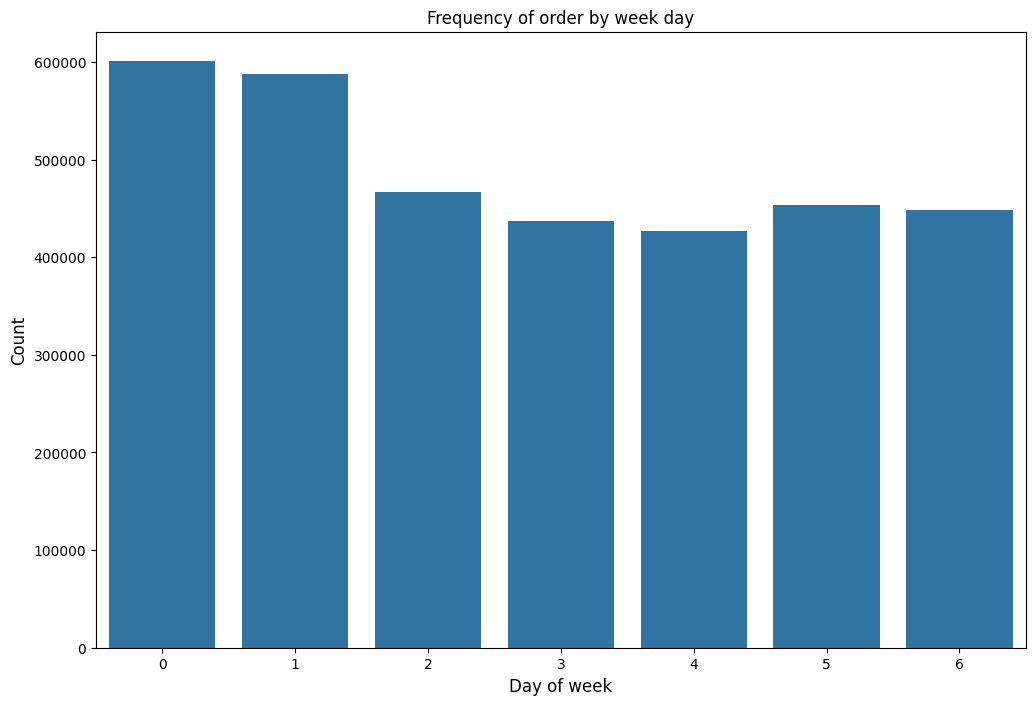

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow',data=orders_df,color=color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Day of week',fontsize=12)
plt.title('Frequency of order by week day',fontsize=12)
plt.show()

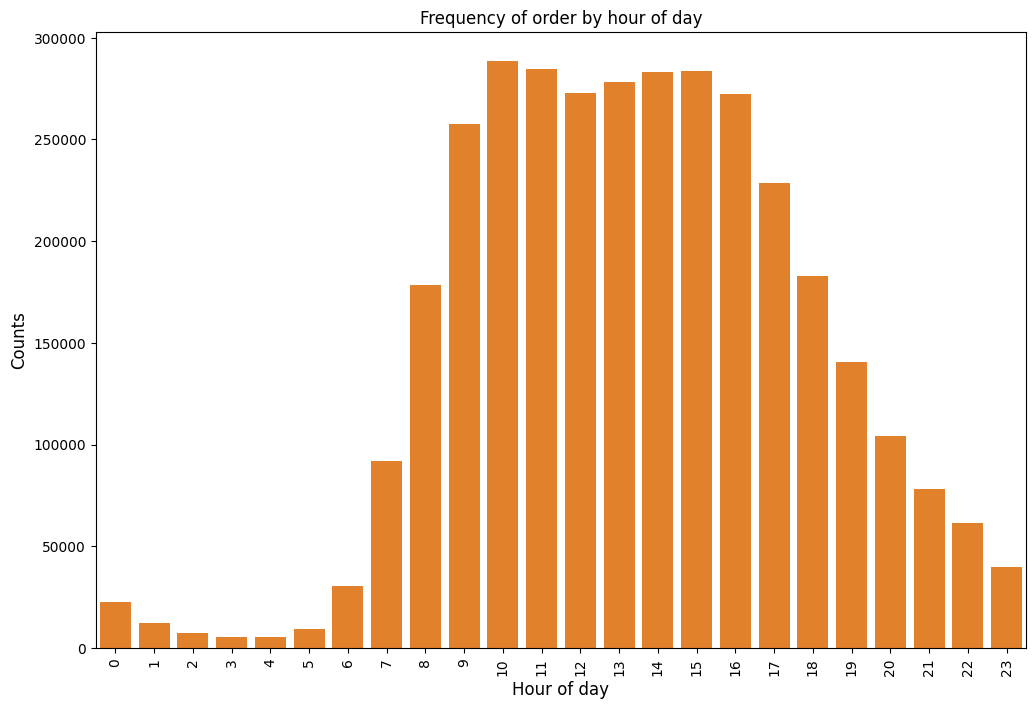

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day',data=orders_df,color=color[1])
plt.xlabel('Hour of day',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.title('Frequency of order by hour of day',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# majority of the orders are made during the daytime

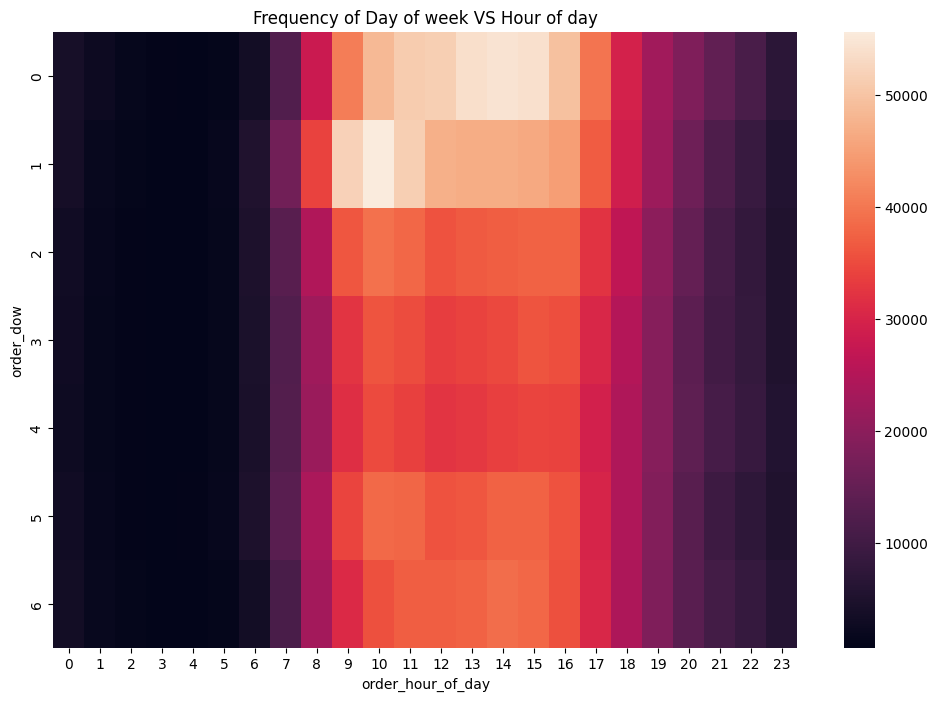

In [ ]:
grouped_df=orders_df.groupby(['order_dow','order_hour_of_day'])['order_number'].agg('count').reset_index()
grouped_df=grouped_df.pivot(index='order_dow',columns='order_hour_of_day',values='order_number')
# pivot() function in pandas reshapes your DataFrame by reorganizing the data based on column values.

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df)
plt.title('Frequency of Day of week VS Hour of day')
plt.show()

# Saturday mornings, Sunday evenings are prime time for orders

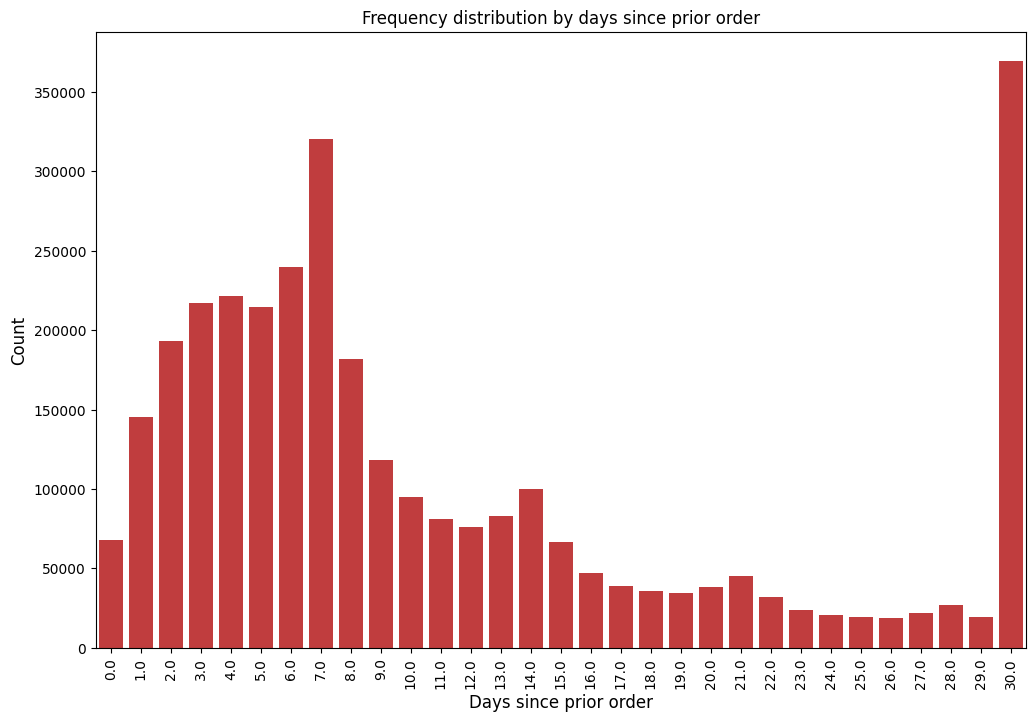

In [ ]:
# Now let us check the time interval between the orders.
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order',data=orders_df,color=color[3])
plt.xlabel('Days since prior order',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Frequency distribution by days since prior order',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0]

0.5896974667922161

In [ ]:
order_products_train_df.reordered.sum()/order_products_train_df.shape[0]

0.5985944127509629

In [ ]:
grouped_df=order_products_prior_df.groupby('order_id')['reordered'].agg('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

,count
reordered,
1,0.879151
0,0.120849


In [ ]:
grouped_df=order_products_train_df.groupby('order_id')['reordered'].agg('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

,count
reordered,
1,0.93444
0,0.06556


In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


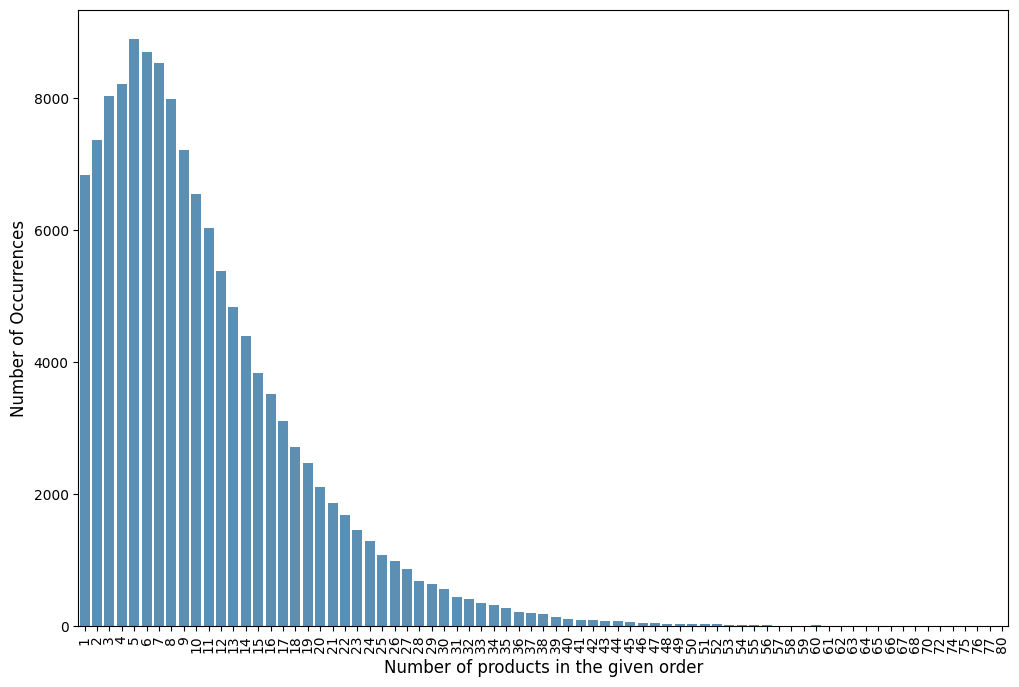

In [ ]:
grouped_df=order_products_train_df.groupby('order_id')['add_to_cart_order'].agg('max').reset_index()
cnt_srs=grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8)
plt.xlabel('Number of products in the given order',fontsize=12)
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
cnt_srs=order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns=['product_name','frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


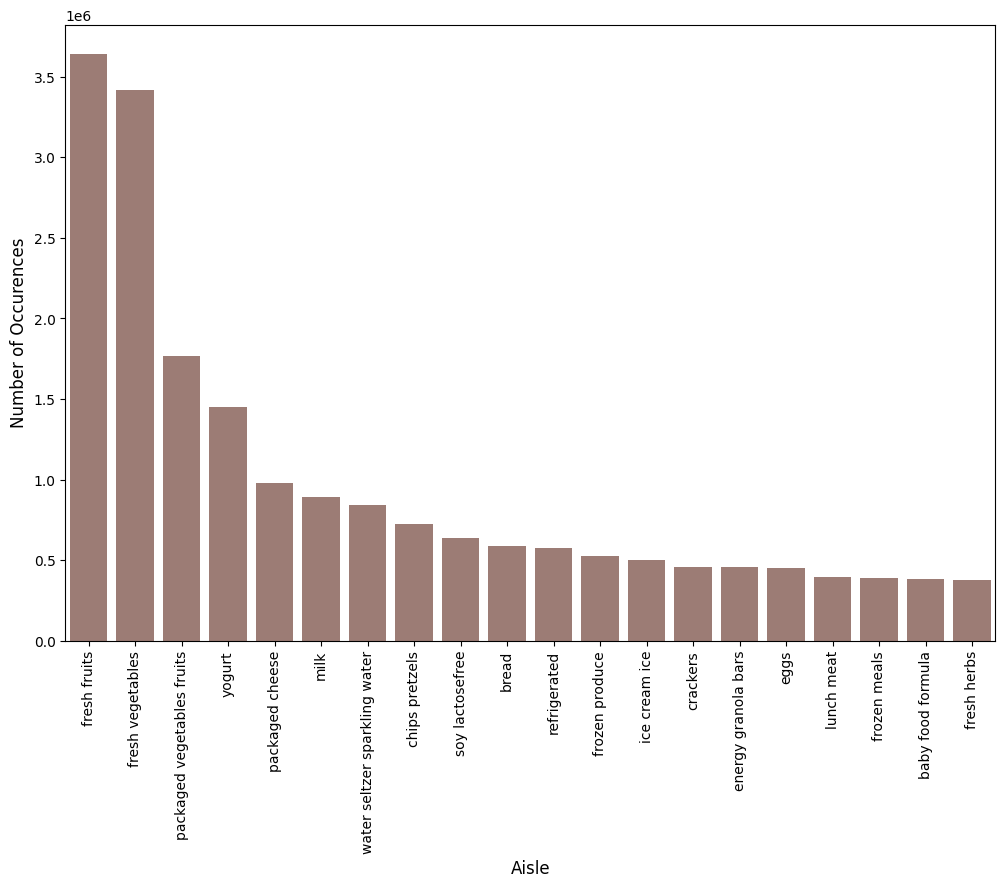

In [ ]:
cnt_srs=order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8,color=color[5])
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Aisle',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

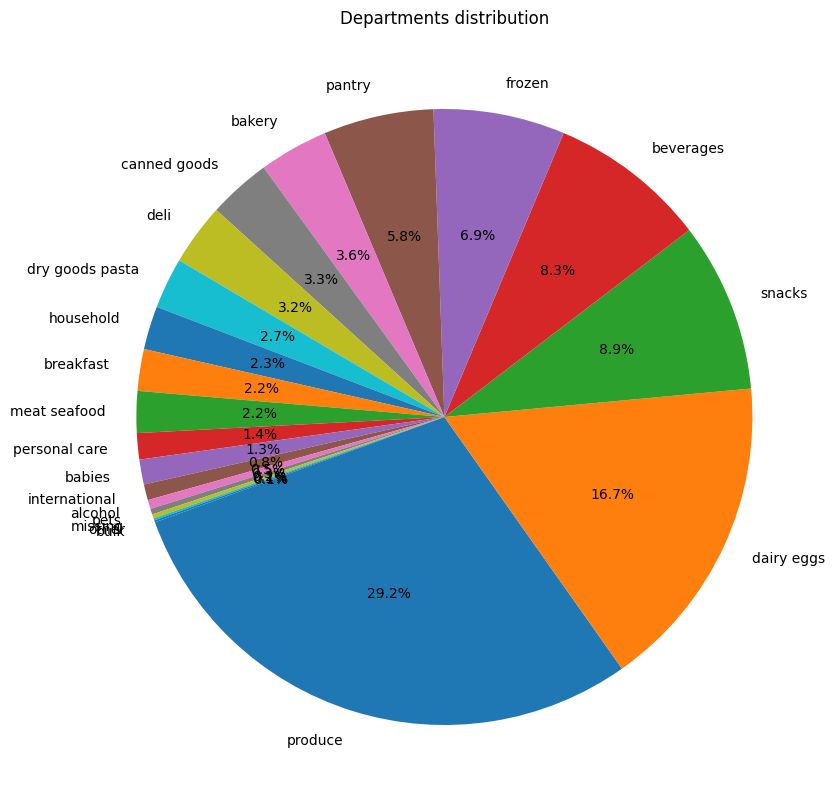

In [ ]:
plt.figure(figsize=(10,10))
temp_series=order_products_prior_df['department'].value_counts()
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series/temp_series.sum())*100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200) # autopct**는 파이 차트에서 **각 파이 조각의 비율(%)**을 표시하기 위한 옵션
#startangle**은 파이 차트의 시작 각도를 지정하는 옵션. 기본적으로 파이 차트는 x축에서 0도로 시작.
plt.title('Departments distribution',fontsize=12)
plt.show()

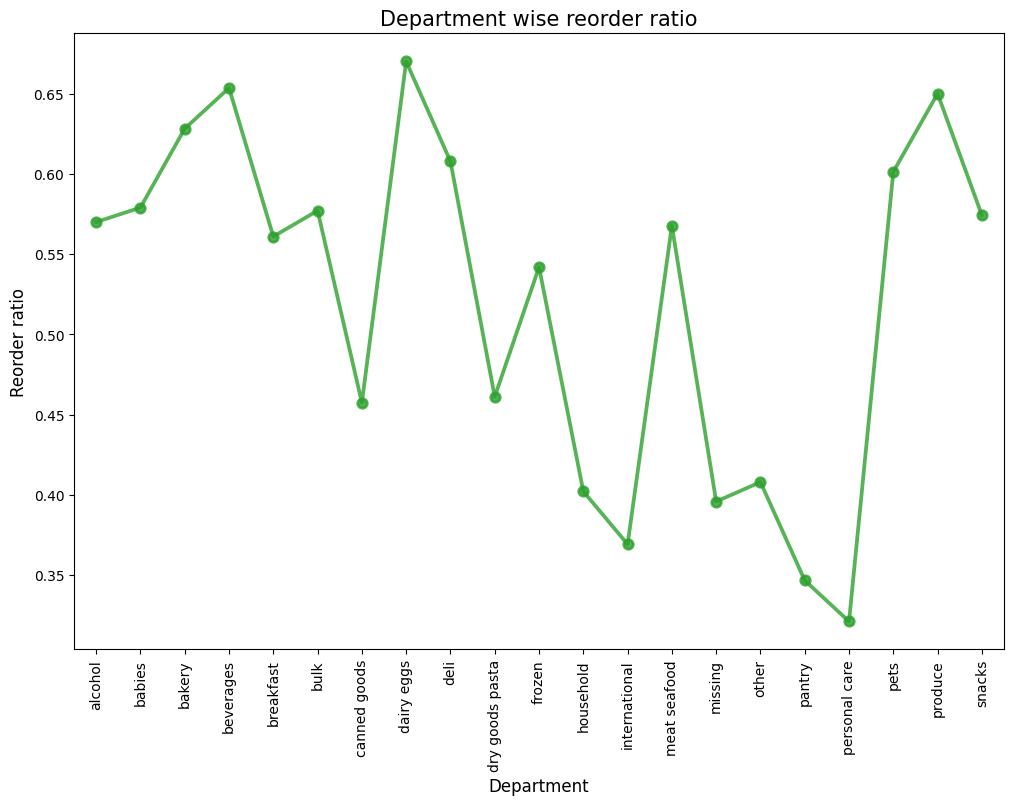

In [ ]:
grouped_df=order_products_prior_df.groupby(['department'])['reordered'].agg('mean').reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[2])
plt.ylabel('Reorder ratio',fontsize=12)
plt.xlabel('Department',fontsize=12)
plt.title('Department wise reorder ratio',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

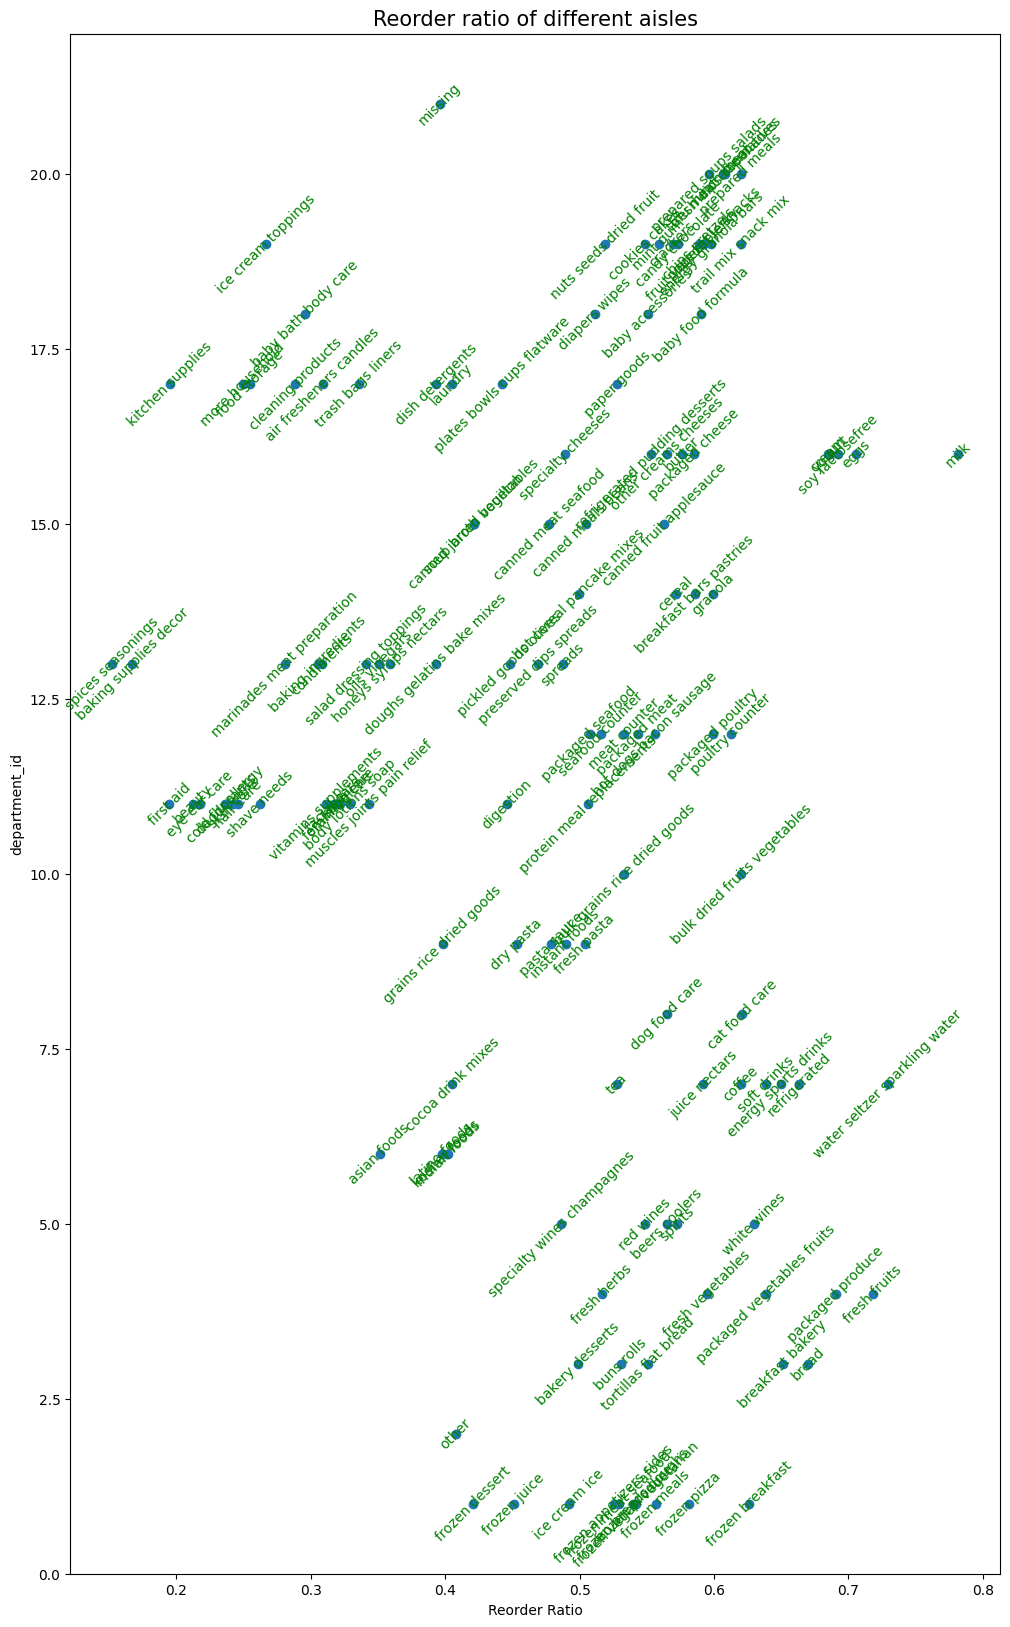

In [ ]:
grouped_df=order_products_prior_df.groupby(['department_id','aisle'])['reordered'].agg('mean').reset_index()
fig,ax=plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values,grouped_df.department_id.values)
for i,txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt,(grouped_df.reordered.values[i],grouped_df.department_id.values[i]),rotation=45,ha='center',va='center',color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles',fontsize=15)
plt.show()

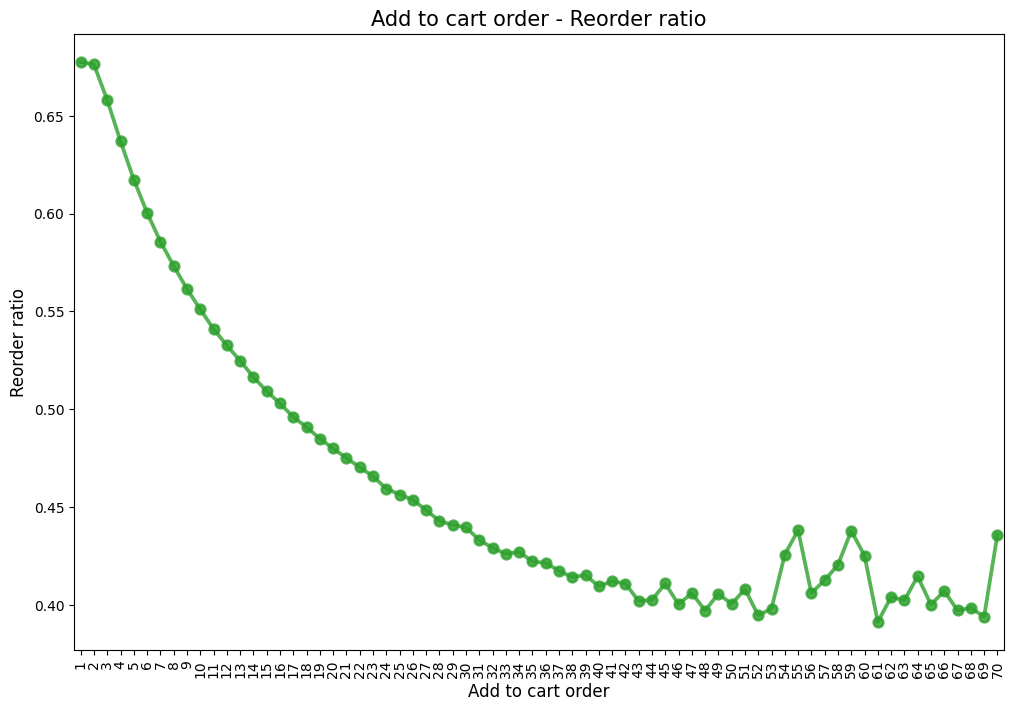

In [ ]:
order_products_prior_df['add_to_cart_order_mod'] = order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70]=70
grouped_df=order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].agg('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

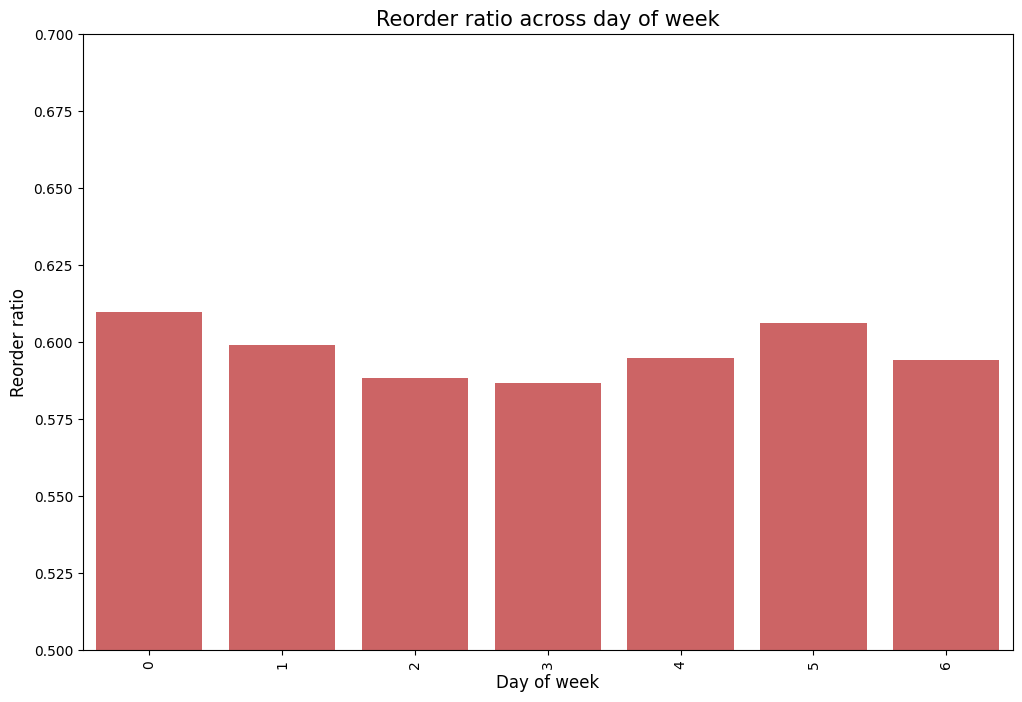

In [ ]:
order_products_train_df=pd.merge(order_products_train_df,orders_df,on='order_id',how='left')
grouped_df = order_products_train_df.groupby(['order_dow'])['reordered'].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7) #y축 범위 설정.
plt.show()

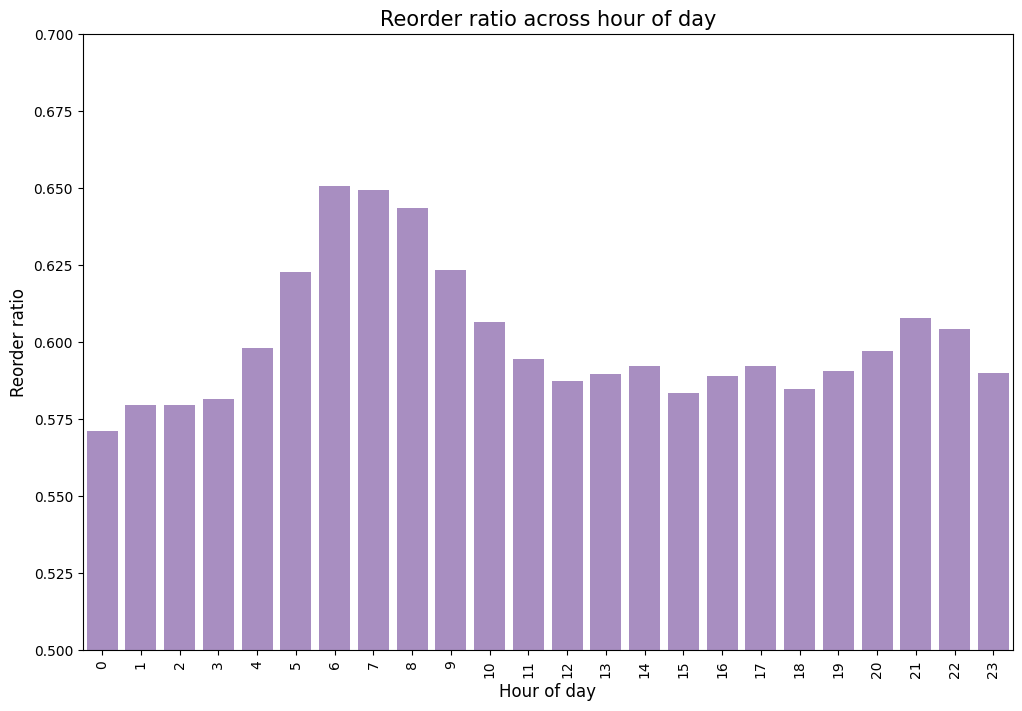

In [ ]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

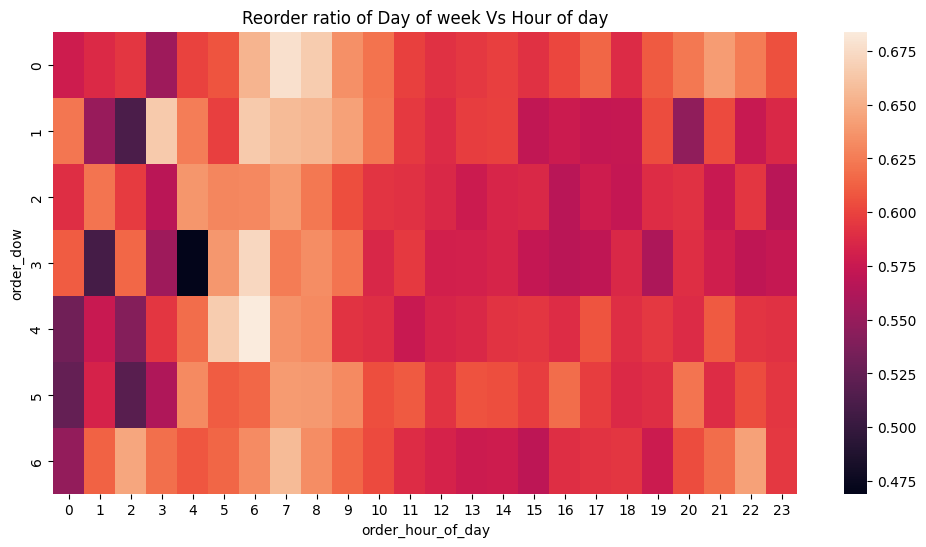

In [ ]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

# 새로운 전처리
특정 요일에 잘 팔리는 물건이 있을까?

In [4]:
# 먼저, 필요한 칼럼은 order_dow, product_name 이다. 이를 위해 DataFrame를 merge 해야함
# orders_df 와 products_df를 on을 통해서 합칠 수 가 없어 두 번에 나누어 merge
a=pd.merge(order_products_prior_df,products_df,on='product_id',how='left')

dowpo=pd.merge(a,orders_df,on='order_id',how='left')

In [ ]:
dowpo.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


In [5]:
# dowpo DataFrame에서 필요한 정보만 추출. order_dow,product_name,reordered
dowpo=dowpo.groupby(['order_dow','product_name'])['reordered'].size().reset_index()
dowpo.head()

,order_dow,product_name,reordered
0,0,#2 Coffee Filters,139
1,0,#2 Cone White Coffee Filters,1
2,0,#2 Mechanical Pencils,1
3,0,#4 Natural Brown Coffee Filters,45
4,0,& Go! Hazelnut Spread + Pretzel Sticks,17


In [6]:
# 요일별로 가장 많이 주문한 건을 보기 위해서 sort_values함
sort_dowpo=dowpo.sort_values(by=['order_dow','reordered'],ascending=[True,False])
sort_dowpo.head()

,order_dow,product_name,reordered
3381,0,Banana,96769
3187,0,Bag of Organic Bananas,71493
26693,0,Organic Baby Spinach,54914
29641,0,Organic Strawberries,53831
28086,0,Organic Hass Avocado,43944


In [15]:
# 각 요일별로 재주문이 가장 많은 상품의 인덱스를 뽑아서
index=sort_dowpo.groupby(['order_dow'])['reordered'].agg('idxmax')

In [16]:
# 해당 데이터만 불러오기
top_ordered_products=sort_dowpo.loc[index]

In [39]:
top_ordered_products

,order_dow,product_name,reordered
3381,0,Banana,96769
49485,1,Banana,87787
95254,2,Banana,59881
140363,3,Banana,53327
185312,4,Banana,52497
230208,5,Banana,58990
275665,6,Banana,63314


<Axes: xlabel='order_dow', ylabel='reordered'>

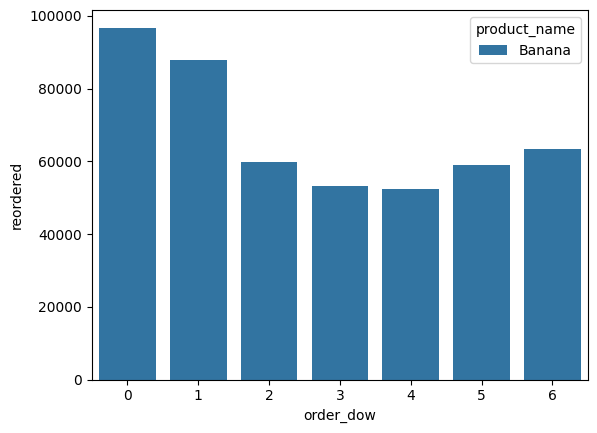

In [44]:
# 시각화를 통해 요일별로, 가장 많이 재주문된 상품을 알 수 있음
sns.barplot(y='reordered', x='order_dow', data=top_ordered_products,hue='product_name')

위 그래프를 통해 모든 요일별로 가장 많이 주문된 상품이 바나나라는 것을 알 수 있다.

본래 특정 요일별로 잘 팔리는 물건이 있는지를 탐색하기 위해 EDA를 진행하였으나, 요일에 상관없이 바나나가 가장 잘 팔리는 상품이라는 것을 알 수 있다.